In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
path = "./dataset_ekg.pkl"
data = None

with open(path, 'rb') as f:
    data = pickle.load(f)

data

{'NSR': array([[-0.06451476, -0.05951476, -0.02951476, ...,  0.13548524,
          0.13048524,  0.11548524],
        [ 0.24548524,  0.25048524,  0.24048524, ...,  0.34048524,
          0.33548524,  0.31548524],
        [ 0.13048524,  0.12548524,  0.11048524, ..., -0.20451476,
         -0.20451476, -0.20451476],
        ...,
        [-0.46451476, -0.46451476, -0.46451476, ..., -0.59451476,
         -0.58951476, -0.58951476],
        [-0.53451476, -0.51451476, -0.53451476, ..., -0.51451476,
         -0.44451476, -0.40451476],
        [ 0.51548524,  0.50548524,  0.50548524, ...,  0.21048524,
          0.20048524,  0.18548524]], shape=(283, 3600)),
 'VT': array([[ 0.10787069,  0.08787069,  0.08787069, ...,  0.01287069,
         -0.00212931,  0.01787069],
        [-0.31212931, -0.29712931, -0.27212931, ...,  0.82787069,
          0.84787069,  0.86787069],
        [ 0.01287069,  0.00787069,  0.00287069, ...,  0.04787069,
          0.06787069,  0.10287069],
        ...,
        [ 0.17287069, 

In [9]:
data.items()

dict_items([('NSR', array([[-0.06451476, -0.05951476, -0.02951476, ...,  0.13548524,
         0.13048524,  0.11548524],
       [ 0.24548524,  0.25048524,  0.24048524, ...,  0.34048524,
         0.33548524,  0.31548524],
       [ 0.13048524,  0.12548524,  0.11048524, ..., -0.20451476,
        -0.20451476, -0.20451476],
       ...,
       [-0.46451476, -0.46451476, -0.46451476, ..., -0.59451476,
        -0.58951476, -0.58951476],
       [-0.53451476, -0.51451476, -0.53451476, ..., -0.51451476,
        -0.44451476, -0.40451476],
       [ 0.51548524,  0.50548524,  0.50548524, ...,  0.21048524,
         0.20048524,  0.18548524]], shape=(283, 3600))), ('VT', array([[ 0.10787069,  0.08787069,  0.08787069, ...,  0.01287069,
        -0.00212931,  0.01787069],
       [-0.31212931, -0.29712931, -0.27212931, ...,  0.82787069,
         0.84787069,  0.86787069],
       [ 0.01287069,  0.00787069,  0.00287069, ...,  0.04787069,
         0.06787069,  0.10287069],
       ...,
       [ 0.17287069,  0.167

In [10]:
for i in data.items():
    print(i[0], type(i[1]), len(i[1]))

NSR <class 'numpy.ndarray'> 283
VT <class 'numpy.ndarray'> 10
IVR <class 'numpy.ndarray'> 10
VFL <class 'numpy.ndarray'> 10
Fusion <class 'numpy.ndarray'> 11
LBBBB <class 'numpy.ndarray'> 103
RBBBB <class 'numpy.ndarray'> 62
SDHB <class 'numpy.ndarray'> 10
PR <class 'numpy.ndarray'> 45
APB <class 'numpy.ndarray'> 66
AFL <class 'numpy.ndarray'> 20
AFIB <class 'numpy.ndarray'> 135
SVTA <class 'numpy.ndarray'> 13
WPW <class 'numpy.ndarray'> 21
PVC <class 'numpy.ndarray'> 133
Bigeminy <class 'numpy.ndarray'> 55
Trigeminy <class 'numpy.ndarray'> 13


In [15]:
list(data.items())[0][1]

array([[-0.06451476, -0.05951476, -0.02951476, ...,  0.13548524,
         0.13048524,  0.11548524],
       [ 0.24548524,  0.25048524,  0.24048524, ...,  0.34048524,
         0.33548524,  0.31548524],
       [ 0.13048524,  0.12548524,  0.11048524, ..., -0.20451476,
        -0.20451476, -0.20451476],
       ...,
       [-0.46451476, -0.46451476, -0.46451476, ..., -0.59451476,
        -0.58951476, -0.58951476],
       [-0.53451476, -0.51451476, -0.53451476, ..., -0.51451476,
        -0.44451476, -0.40451476],
       [ 0.51548524,  0.50548524,  0.50548524, ...,  0.21048524,
         0.20048524,  0.18548524]], shape=(283, 3600))

In [16]:
df_signals = pd.DataFrame(list(data.items())[0][1])
df_signals["target"]   = list(data.items())[0][0]

df_aux = pd.DataFrame()


for i in list(data.items())[1:]:
    df_aux = pd.DataFrame(i[1])
    df_aux["target"]   = i[0]

    df_signals = pd.concat([df_signals, df_aux], ignore_index=True)

In [17]:
df_signals

0         1         2         3         4         5         6  \
0   -0.064515 -0.059515 -0.029515 -0.019515 -0.014515 -0.014515 -0.019515   
1    0.245485  0.250485  0.240485  0.230485  0.240485  0.240485  0.250485   
2    0.130485  0.125485  0.110485  0.100485  0.105485  0.115485  0.120485   
3   -0.499515 -0.409515 -0.394515 -0.419515 -0.469515 -0.504515 -0.559515   
4    0.245485  0.265485  0.255485  0.250485  0.230485  0.235485  0.245485   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.890432 -0.900432 -0.915432 -0.940432 -0.950432 -0.965432 -0.970432   
996  1.614568  1.449568  1.104568  0.694568  0.289568  0.009568 -0.100432   
997  0.054568  0.054568  0.039568  0.044568  0.044568  0.044568  0.059568   
998  0.089568  0.079568  0.069568  0.074568  0.079568  0.094568  0.084568   
999  0.219568  0.214568  0.234568  0.254568  0.274568  0.274568  0.274568   

            7         8         9  ...      3591      3592      3593  \
0   -0.009515  0.020485  0.030485  ...  0.125485  0.130485  0.120485   
1    0.235485  0.215485  0.220485  ...  0.390485  0.375485  0.375485   
2    0.095485  0.090485  0.085485  ... -0.139515 -0.144515 -0.164515   
3   -0.589515 -0.614515 -0.639515  ... -0.694515 -0.709515 -0.699515   
4    0.280485  0.270485  0.275485  ...  0.115485  0.110485  0.120485   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.985432 -1.015432 -1.030432  ... -0.500432 -0.515432 -0.520432   
996 -0.120432 -0.125432 -0.150432  ...  0.189568  0.199568  0.219568   
997  0.059568  0.049568  0.044568  ...  0.254568  0.169568  0.094568   
998  0.074568  0.084568  0.079568  ...  0.089568  0.089568  0.094568   
999  0.289568  0.304568  0.334568  ...  0.074568  0.059568  0.064568   

         3594      3595      3596      3597      3598      3599     target  
0    0.110485  0.110485  0.120485  0.135485  0.130485  0.115485        NSR  
1    0.385485  0.370485  0.355485  0.340485  0.335485  0.315485        NSR  
2   -0.159515 -0.169515 -0.189515 -0.204515 -0.204515 -0.204515        NSR  
3   -0.689515 -0.669515 -0.684515 -0.694515 -0.694515 -0.674515        NSR  
4    0.130485  0.140485  0.135485  0.120485  0.110485  0.120485        NSR  
..        ...       ...       ...       ...       ...       ...        ...  
995 -0.545432 -0.550432 -0.565432 -0.565432 -0.580432 -0.605432  Trigeminy  
996  0.274568  0.339568  0.389568  0.394568  0.349568  0.339568  Trigeminy  
997  0.064568  0.069568  0.104568  0.119568  0.129568  0.129568  Trigeminy  
998  0.099568  0.094568  0.084568  0.089568  0.089568  0.084568  Trigeminy  
999  0.049568  0.059568  0.069568  0.069568  0.074568  0.069568  Trigeminy  

[1000 rows x 3601 columns]

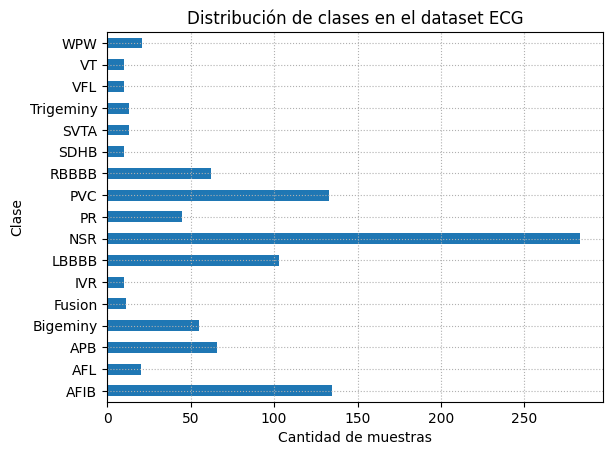

In [21]:
df_signals.groupby('target').size().plot(kind='barh')
plt.grid(ls=":")
plt.xlabel("Cantidad de muestras")
plt.ylabel("Clase")
plt.title("Distribución de clases en el dataset ECG")
plt.show()

In [22]:
df_signals.to_csv("./dataset_ekg.csv", index=False)